In [1]:
# common packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
# Load data
patients_df = pd.read_csv("../Paitients_Files_Train.csv", delimiter=",").drop(columns=["ID", "Insurance"])
column_names = {
    "PRG": "BGlucose",
    "PR": "BPressure",
    "PL": "B1",
    "SK": "B2",
    "TS": "B3",
    "BD2": "B4",
    "M11": "BMI",
    "Sepssis": "Sepsis"
}
patients_df = patients_df.rename(columns= column_names)
patients_df.head()

,BGlucose,B1,BPressure,B2,B3,BMI,B4,Age,Sepsis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


In [3]:
patients_df.describe()

,BGlucose,B1,BPressure,B2,B3,BMI,B4,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
patients_df.isnull().sum()

BGlucose     0
B1           0
BPressure    0
B2           0
B3           0
BMI          0
B4           0
Age          0
Sepsis       0
dtype: int64

In [5]:
patients_df.isna().sum()

BGlucose     0
B1           0
BPressure    0
B2           0
B3           0
BMI          0
B4           0
Age          0
Sepsis       0
dtype: int64

- There are 599 entries and 8 columns
- No missing values

In [6]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BGlucose   599 non-null    int64  
 1   B1         599 non-null    int64  
 2   BPressure  599 non-null    int64  
 3   B2         599 non-null    int64  
 4   B3         599 non-null    int64  
 5   BMI        599 non-null    float64
 6   B4         599 non-null    float64
 7   Age        599 non-null    int64  
 8   Sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


# 1. Univariable Analysis

## 1.2 BGlucose

In [7]:
print("Max Blood Glucose:", patients_df.BGlucose.max())
print("Min Blood Glucose:", patients_df.BGlucose.min())

Max Blood Glucose: 17
Min Blood Glucose: 0


<Figure size 648x360 with 0 Axes>

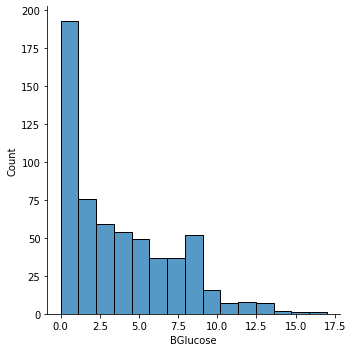

In [8]:
plt.figure(figsize=(9,5))
sns.displot(patients_df.BGlucose)
plt.show()

*Comments*:
- Blood Glucose value range from 0 to 17
- It's skewed

## 1.3 Age

In [9]:
print("Max Age:", patients_df.Age.max())
print("Min Age:", patients_df.Age.min())

Max Age: 81
Min Age: 21


<Figure size 648x360 with 0 Axes>

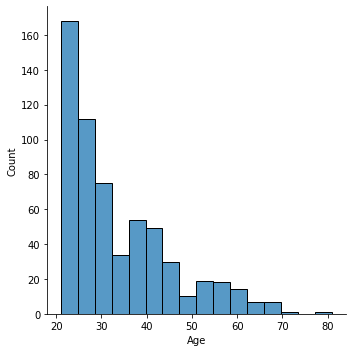

In [10]:
plt.figure(figsize=(9,5))
sns.displot(patients_df.Age)
plt.show()

*Comments*:
- Age ranges from 21 to 81, good representative of real-world diversity
- heavily skewed


# 2. Basic Data  Analysis

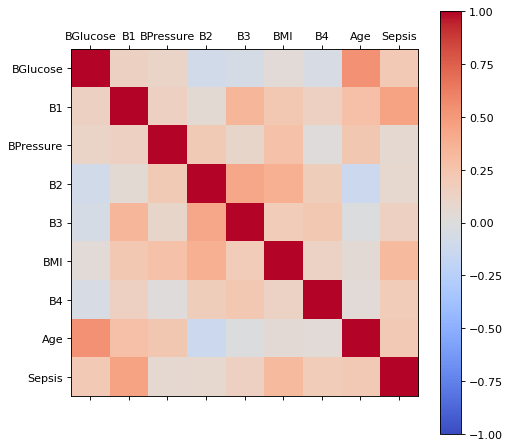

In [11]:
# heatmap
df = patients_df
df["Sepsis"] = np.where(df["Sepsis"].str.contains("Positive"), 1, 0)
n = len(df.columns)
correlations = df.corr()
fig = plt.figure(figsize=(7, 7), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
fig.colorbar(cax)
ticks = np.arange(0,n,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

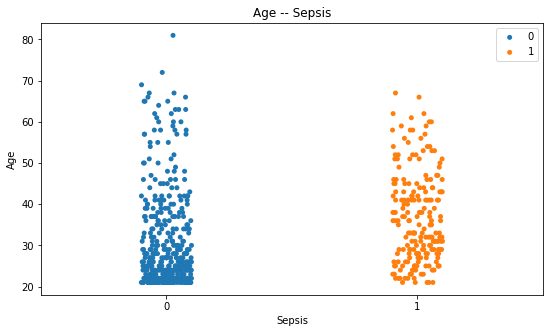

In [12]:
plt.figure(figsize=(9,5))
sns.stripplot(x="Sepsis", y="Age", data=patients_df)
plt.legend(patients_df.Sepsis.value_counts().index)
plt.title("Age -- Sepsis")
plt.show()

*Comments*:
- Age feature isn't useful to detect Positive and Negative class

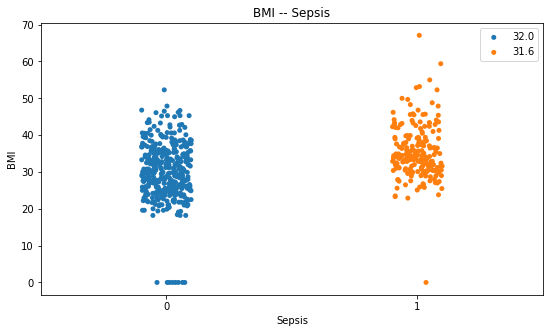

In [13]:
plt.figure(figsize=(9,5))
sns.stripplot(x="Sepsis", y="BMI", data=patients_df)
plt.legend(patients_df.BMI.value_counts().index)
plt.title("BMI -- Sepsis")
plt.show()

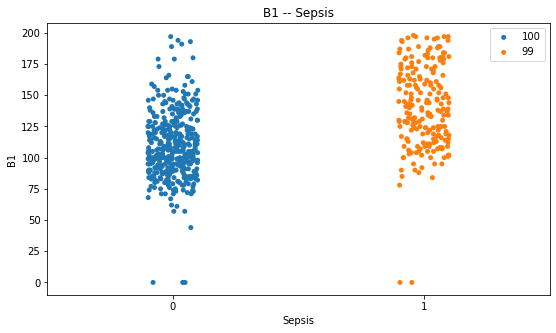

In [14]:
plt.figure(figsize=(9,5))
sns.stripplot(x="Sepsis", y="B1", data=patients_df)
plt.legend(patients_df.B1.value_counts().index)
plt.title("B1 -- Sepsis")
plt.show()

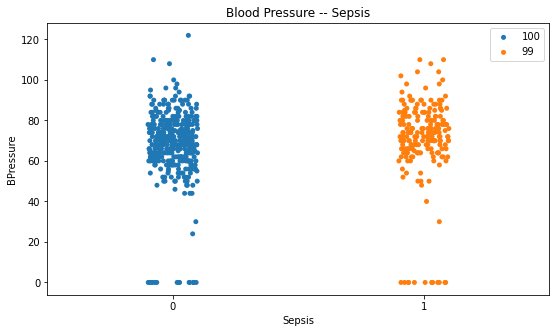

In [15]:
plt.figure(figsize=(9,5))
sns.stripplot(x="Sepsis", y="BPressure", data=patients_df)
plt.legend(patients_df.B1.value_counts().index)
plt.title("Blood Pressure -- Sepsis")
plt.show()

## Probability

In [16]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df_data = patients_df
temp = df_data[df_data.Age.isnull() == False][['Sepsis','Age']]
# temp['Sepsis'].replace([False, True], [0,1], inplace = True)
temp

,Sepsis,Age
0,1,50
1,0,31
2,1,32
3,0,21
4,1,33
...,...,...
594,0,34
595,1,22
596,0,46
597,0,21


In [ ]:
#Creating bins and labels
bins = [1,19,30,50,100]
labels = [1,2,3,4]

temp['Age'] = pd.cut(temp['Age'],bins = bins, labels = labels)

In [ ]:
temp.Age.value_counts()

2    323
3    209
4     67
1      0
Name: Age, dtype: int64

In [ ]:
temp['Sepsis'] = temp.groupby('Age')['Sepsis'].transform('mean')

In [ ]:

fig = px.scatter(temp, x='Age',y='Sepsis', color="Sepsis", color_continuous_scale='Blugrn', size='Sepsis')
fig.update_xaxes(showgrid = False, showline = True, gridwidth = 0.05, linecolor = 'gray', zeroline = False, linewidth = 2)
fig.update_yaxes(showline = True, gridwidth = 0.05, linecolor = 'gray', linewidth = 2, zeroline = False)

# General Styling
fig.update_layout(height=400,
              margin=dict(b=50,r=30,l=100,t=100),
              title = "<span style='font-size:36px; font-family:Times New Roman'>Sepsis Probability per Age Analysis</span>",                  
              plot_bgcolor='rgb(242,242,242)',
              paper_bgcolor = 'rgb(242,242,242)',
              font=dict(family="Times New Roman", size= 14),
              hoverlabel=dict(font_color="floralwhite"),
              showlegend=False)
fig.show()

In [ ]:
#Creating bins and labels
bins = [1,19,30,50,100]
labels = [1,2,3,4]

patients_df['Age'] = pd.cut(patients_df['Age'],bins = bins, labels = labels)
patients_df.Age.value_counts()

2    323
3    209
4     67
1      0
Name: Age, dtype: int64

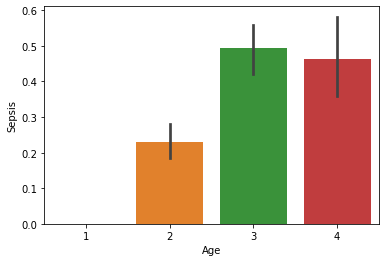

,Age,Sepsis
0,1,NaN
1,2,0.229102
2,3,0.492823
3,4,0.462687


In [ ]:
import seaborn as sns
sns.barplot(x="Age", y="Sepsis", data=patients_df)
plt.show();

patients_df[['Age', 'Sepsis']].groupby('Age',as_index=False).mean()

*Comments*:
- It's showed that the older patients are the high chance they have Sepsis, particularly around the age of 50 to 60.
- However, above 60, chance of getting Sepsis is not clearly noticeable.

In [ ]:
df_data = patients_df
temp = df_data[df_data.B1.isnull() == False][['B1','Sepsis']]
# temp['Sepsis'].replace([False, True], [0,1], inplace = True)
temp['Sepsis'] = temp.groupby('B1')['Sepsis'].transform('mean')
temp ## probability of having Sepsis at the given age
fig = px.scatter(temp, x='B1',y='Sepsis', color="Sepsis", color_continuous_scale='Blugrn', size='Sepsis')
fig.update_xaxes(showgrid = False, showline = True, gridwidth = 0.05, linecolor = 'gray', zeroline = False, linewidth = 2)
fig.update_yaxes(showline = True, gridwidth = 0.05, linecolor = 'gray', linewidth = 2, zeroline = False)

# General Styling
fig.update_layout(height=400,
              margin=dict(b=50,r=30,l=100,t=100),
              title = "<span style='font-size:36px; font-family:Times New Roman'>Sepsis Probability per B1 Analysis</span>",                  
              plot_bgcolor='rgb(242,242,242)',
              paper_bgcolor = 'rgb(242,242,242)',
              font=dict(family="Times New Roman", size= 14),
              hoverlabel=dict(font_color="floralwhite"),
              showlegend=False)
fig.show()

*Comments*:
- B1 correlates with Sepsis.
- If B1 of patients > 150, they will have a high probability of having Sepsis

In [ ]:
from sklearn.impute import KNNImputer
from math import sqrt
from sklearn.compose import ColumnTransformer

patients_df["BMI"].replace({0:np.nan}, inplace=True)

no_neighbors = int(sqrt(len(patients_df)))
imputer = KNNImputer(n_neighbors=no_neighbors)


X_imput = imputer.fit_transform(patients_df)
patients_df = pd.DataFrame(X_imput, columns=["BGlucose","B1","BPressure", "B2", "B3", "BMI","B4", "Age", "Sepsis"])

In [ ]:
df_data = patients_df
temp = df_data[df_data.BMI.isnull() == False][['BMI','Sepsis']]

In [ ]:
#Creating bins and labels
bins = [1,18.5,25.0,30.0,100]
labels = [1,2,3,4]

temp['BMI'] = pd.cut(temp['BMI'],bins = bins, labels = labels)
temp.BMI.value_counts()

4    367
3    144
2     84
1      4
Name: BMI, dtype: int64

In [ ]:

# temp['Sepsis'].replace([False, True], [0,1], inplace = True)
temp['Sepsis'] = temp.groupby('BMI')['Sepsis'].transform('mean')
temp ## probability of having Sepsis at the given age
fig = px.scatter(temp, x='BMI',y='Sepsis', color="Sepsis", color_continuous_scale='Blugrn', size='Sepsis')
fig.update_xaxes(showgrid = False, showline = True, gridwidth = 0.05, linecolor = 'gray', zeroline = False, linewidth = 2)
fig.update_yaxes(showline = True, gridwidth = 0.05, linecolor = 'gray', linewidth = 2, zeroline = False)

# General Styling
fig.update_layout(height=400,
              margin=dict(b=50,r=30,l=100,t=100),
              title = "<span style='font-size:36px; font-family:Times New Roman'>Sepsis Probability per BMI Analysis</span>",                  
              plot_bgcolor='rgb(242,242,242)',
              paper_bgcolor = 'rgb(242,242,242)',
              font=dict(family="Times New Roman", size= 14),
              hoverlabel=dict(font_color="floralwhite"),
              showlegend=False)
fig.show()

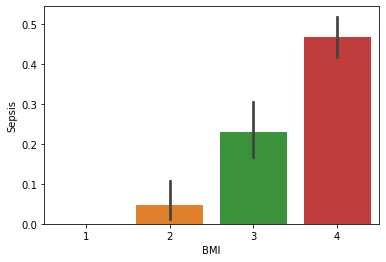

,BMI,Sepsis
0,1,0.000000
1,2,0.047619
2,3,0.229167
3,4,0.465940


In [ ]:
import seaborn as sns
sns.barplot(x="BMI", y="Sepsis", data=temp)
plt.show();

temp[['BMI', 'Sepsis']].groupby('BMI',as_index=False).mean()